# **🔍 Comparison of Model Accuracies on Imbalanced Credit Card Fraud Detection Dataset**  
## *Without Any Balancing Technique*  

---

### 📊 **Overview:**  
This notebook evaluates the performance of various machine learning models on an imbalanced credit card fraud detection dataset.  
The analysis highlights how imbalance in the dataset affects model accuracies without any balancing techniques applied.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


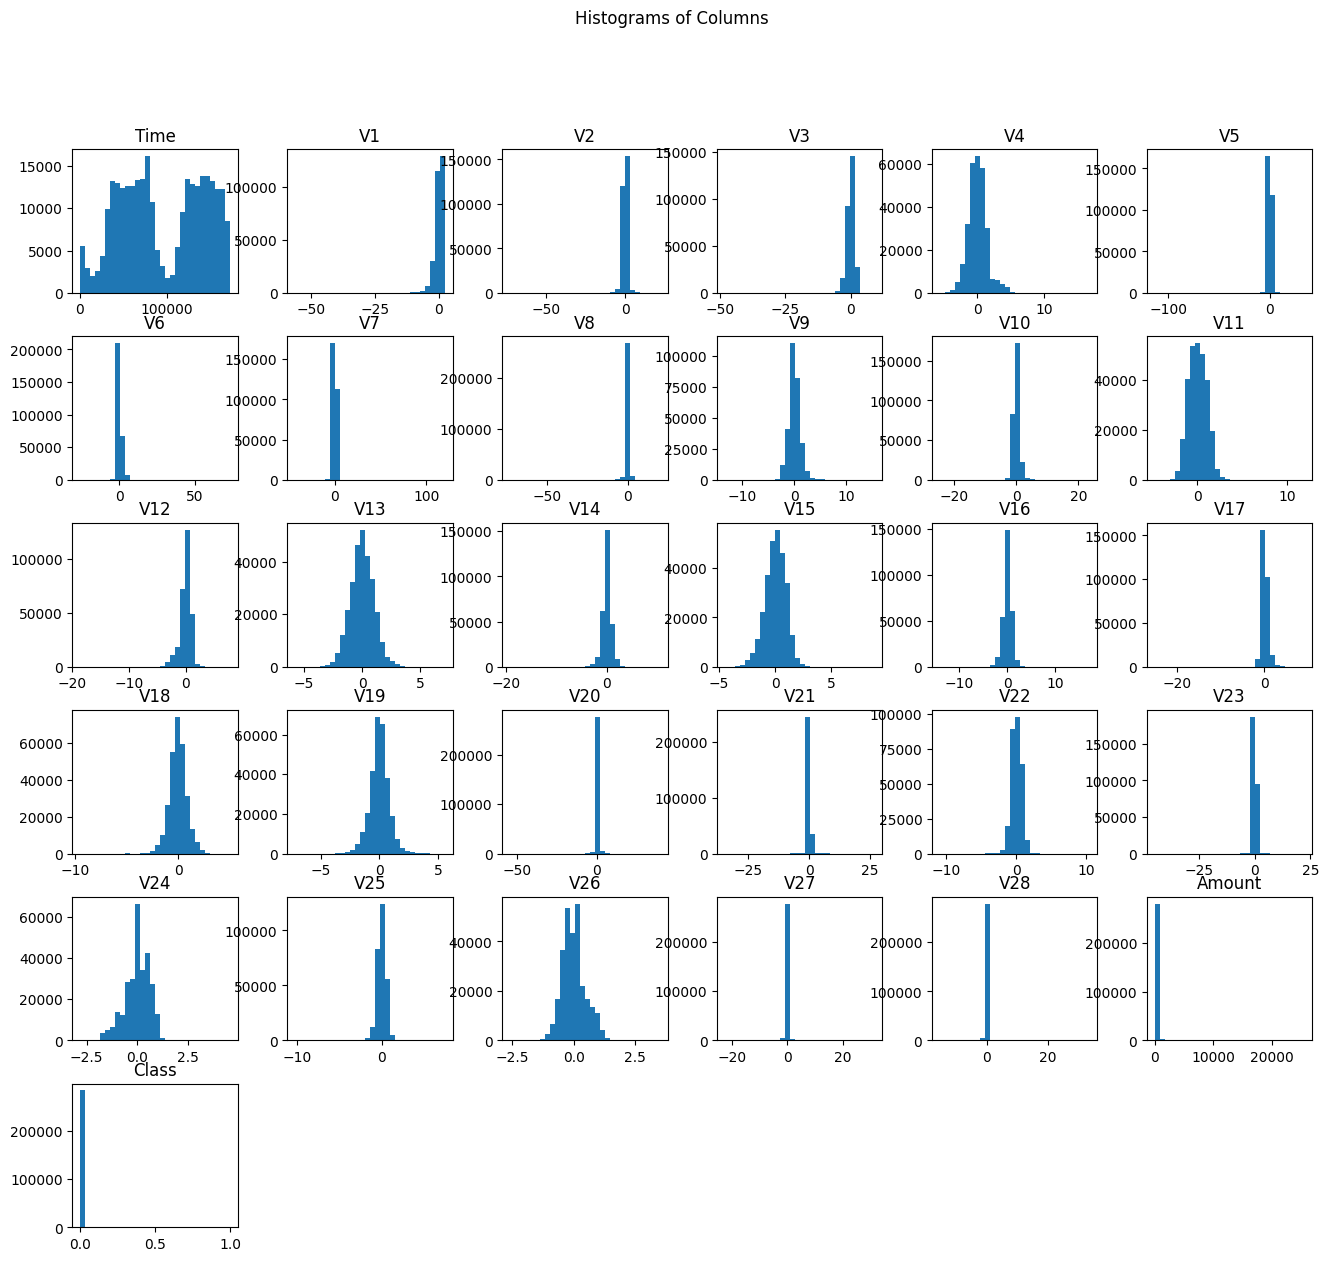

In [7]:
df.hist(bins=30,figsize=(16,14), grid=False )
plt.suptitle('Histograms of Columns')
plt.show()




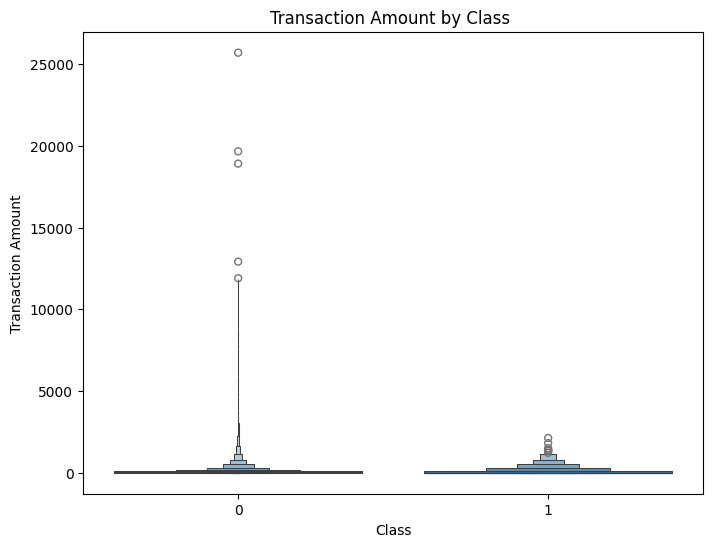

In [8]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount by Class ')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

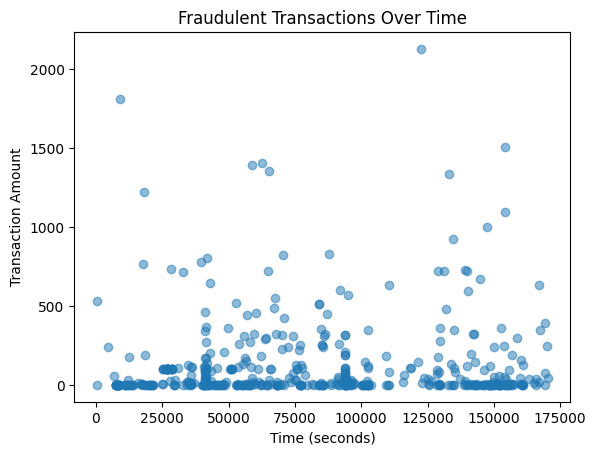

In [9]:
fraud = df[df['Class'] == 1]
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

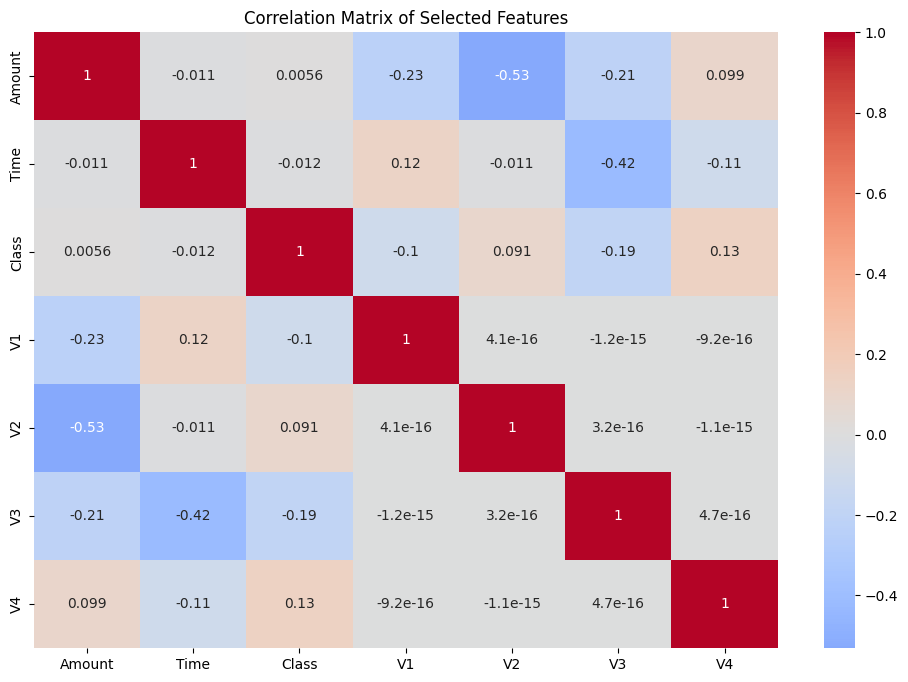

In [10]:
# Correlation matrix for important features
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Amount', 'Time', 'Class'] + [f'V{i}' for i in range(1, 5)]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

print('Fraudulent Transactions:', len(fraud))
print('Legitimate Transactions:', len(legit))

Fraudulent Transactions: 492
Legitimate Transactions: 284315


In [13]:
from sklearn.preprocessing import StandardScaler
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])

fraud_train, fraud_test = train_test_split(fraud, test_size=0.3, random_state=42)
legit_train, legit_test = train_test_split(legit, test_size=0.3, random_state=42)

train_data = pd.concat([fraud_train, legit_train])
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
print('Training Data Shape:', train_data.shape)

print('Fraud Data test Shape: ', fraud_test.shape)
print('Legitimate Data test Shape: ', legit_test.shape)

train_data = train_data.values
fraud_test = fraud_test.values
legit_test = legit_test.values

x_train = train_data[:, 1:30]
y_train = train_data[:, 30]


x_fraud_test = fraud_test[:, 1:30]
y_fraud_test = fraud_test[:, 30]

x_legit_test = legit_test[:, 1:30]
y_legit_test = legit_test[:, 30]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_fraud_test = scaler.transform(x_fraud_test)
x_legit_test = scaler.transform(x_legit_test)

print('X_train Shape:', x_train.shape)
print('Y_train Shape:', y_train.shape)
print('X_fraud_test Shape:', x_fraud_test.shape)
print('Y_fraud_test Shape:', y_fraud_test.shape)
print('X_legit_test Shape:', x_legit_test.shape)
print('Y_legit_test Shape:', y_legit_test.shape)

Training Data Shape: (199364, 31)
Fraud Data test Shape:  (148, 31)
Legitimate Data test Shape:  (85295, 31)
X_train Shape: (199364, 29)
Y_train Shape: (199364,)
X_fraud_test Shape: (148, 29)
Y_fraud_test Shape: (148,)
X_legit_test Shape: (85295, 29)
Y_legit_test Shape: (85295,)


In [16]:

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)


dt_model.fit(x_train, y_train)

accuracy_legit_dt = dt_model.score(x_legit_test, y_legit_test)
accuracy_fraud_dt = dt_model.score(x_fraud_test, y_fraud_test)

print("DecisionTreeClassifier Accuracy_legit: {0:.5f}".format(accuracy_legit_dt))
print("DecisionTreeClassifier Accuracy_fraud: {0:.5f}".format(accuracy_fraud_dt))

DecisionTreeClassifier Accuracy_legit: 0.99982
DecisionTreeClassifier Accuracy_fraud: 0.77703


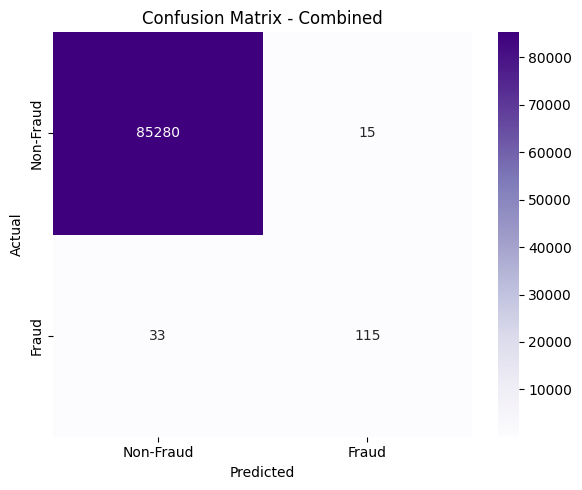

In [18]:
from sklearn.metrics import confusion_matrix
# Combine test data and labels
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict using the model
y_pred_combined = dt_model.predict(x_combined_test)

# Compute combined confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Purples", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(x_train, y_train)

accuracy_legit_rf = rf_model.score(x_legit_test, y_legit_test)
accuracy_fraud_rf = rf_model.score(x_fraud_test, y_fraud_test)

print("RandomForestClassifier Accuracy_legit: {0:.5f}".format(accuracy_legit_rf))
print("RandomForestClassifier Accuracy_fraud: {0:.5f}".format(accuracy_fraud_rf))

RandomForestClassifier Accuracy_legit: 0.99988
RandomForestClassifier Accuracy_fraud: 0.81757


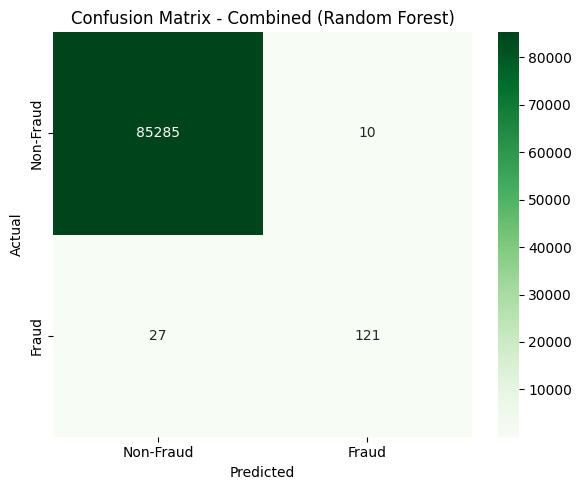

In [20]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = rf_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [21]:
svm_model = SVC(C=1.0, random_state=42)
svm_model.fit(x_train, y_train)

accuracy_legit_svm = svm_model.score(x_legit_test, y_legit_test)
accuracy_fraud_svm = svm_model.score(x_fraud_test, y_fraud_test)

print("svm Accuracy_legit: {0:.5f}".format(accuracy_legit_svm))
print("svm Accuracy_fraud: {0:.5f}".format(accuracy_fraud_svm))

svm Accuracy_legit: 0.99991
svm Accuracy_fraud: 0.68919


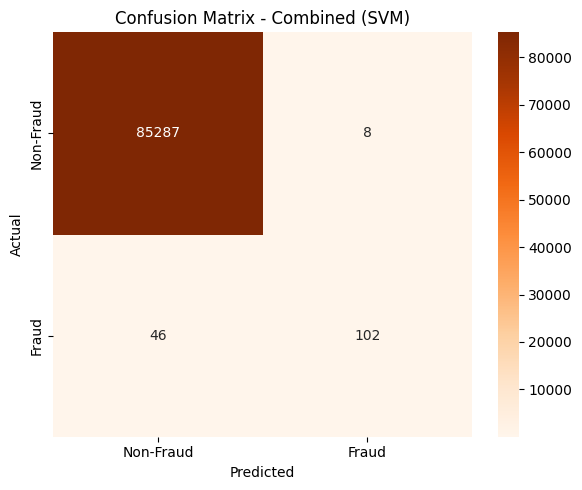

In [22]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = svm_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Oranges", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [23]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(x_train, y_train)

accuracy_legit_lr = svm_model.score(x_legit_test, y_legit_test)
accuracy_fraud_lr = svm_model.score(x_fraud_test, y_fraud_test)

print("Regression Accuracy_legit: {0:.5f}".format(accuracy_legit_lr))
print("Regression Accuracy_fraud: {0:.5f}".format(accuracy_fraud_lr))


Regression Accuracy_legit: 0.99991
Regression Accuracy_fraud: 0.68919


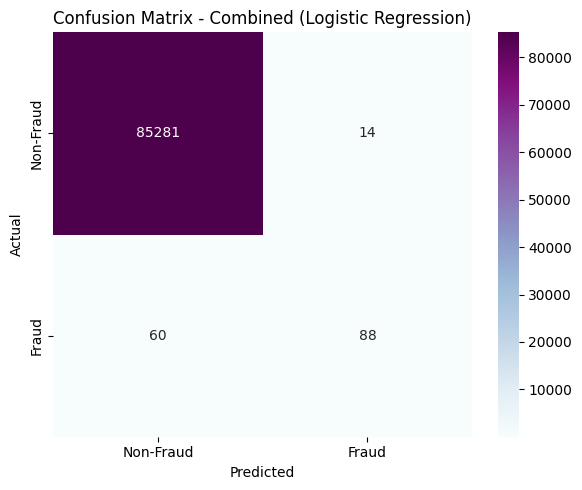

In [24]:

# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = logreg_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="BuPu", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(x_train, y_train)

# Calculate accuracy
accuracy_legit_ab = adaboost_model.score(x_legit_test, y_legit_test)
accuracy_fraud_ab = adaboost_model.score(x_fraud_test, y_fraud_test)

print("AdaBoost Accuracy_legit: {0:.5f}".format(accuracy_legit_ab))
print("AdaBoost Accuracy_fraud: {0:.5f}".format(accuracy_fraud_ab))

AdaBoost Accuracy_legit: 0.99960
AdaBoost Accuracy_fraud: 0.62838


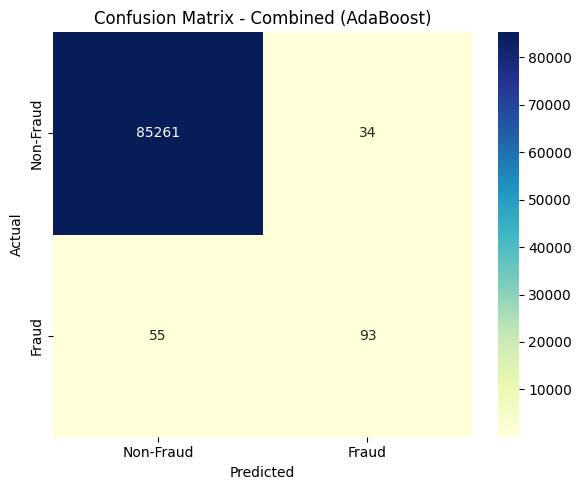

In [26]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = adaboost_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (AdaBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(x_train, y_train)

# Calculate accuracy
accuracy_legit_gnb = gnb_model.score(x_legit_test, y_legit_test)
accuracy_fraud_gnb = gnb_model.score(x_fraud_test, y_fraud_test)

print("GaussianNB Accuracy_legit: {0:.5f}".format(accuracy_legit_gnb))
print("GaussianNB Accuracy_fraud: {0:.5f}".format(accuracy_fraud_gnb))

GaussianNB Accuracy_legit: 0.97822
GaussianNB Accuracy_fraud: 0.84459


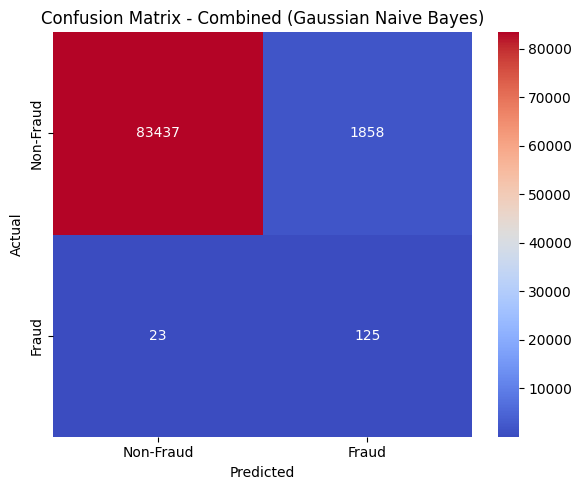

In [28]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = gnb_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (Gaussian Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of k (n_neighbors) as needed

# Train the model
knn_model.fit(x_train, y_train)

# Calculate accuracy
accuracy_legit_knn = knn_model.score(x_legit_test, y_legit_test)
accuracy_fraud_knn = knn_model.score(x_fraud_test, y_fraud_test)

print("KNeighbors Accuracy_legit: {0:.5f}".format(accuracy_legit_knn))
print("KNeighbors Accuracy_fraud: {0:.5f}".format(accuracy_fraud_knn))

KNeighbors Accuracy_legit: 0.99985
KNeighbors Accuracy_fraud: 0.76351


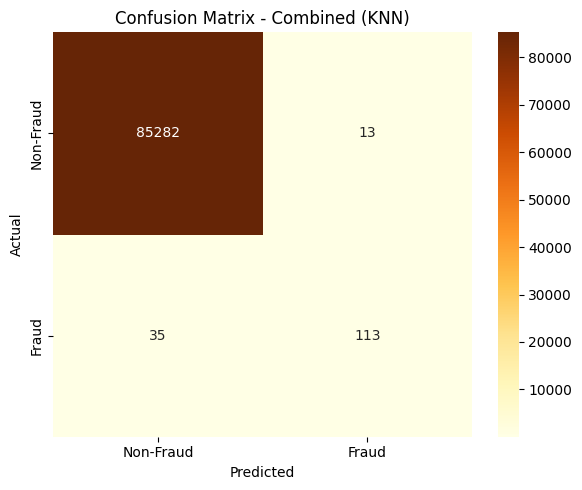

In [30]:

# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = knn_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="YlOrBr", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [32]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Calculate accuracy
accuracy_legit_xgb = xgb_model.score(x_legit_test, y_legit_test)
accuracy_fraud_xgb = xgb_model.score(x_fraud_test, y_fraud_test)

print("XGBoost Accuracy_legit: {0:.5f}".format(accuracy_legit_xgb))
print("XGBoost Accuracy_fraud: {0:.5f}".format(accuracy_fraud_xgb))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:11:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy_legit: 0.99988
XGBoost Accuracy_fraud: 0.77027


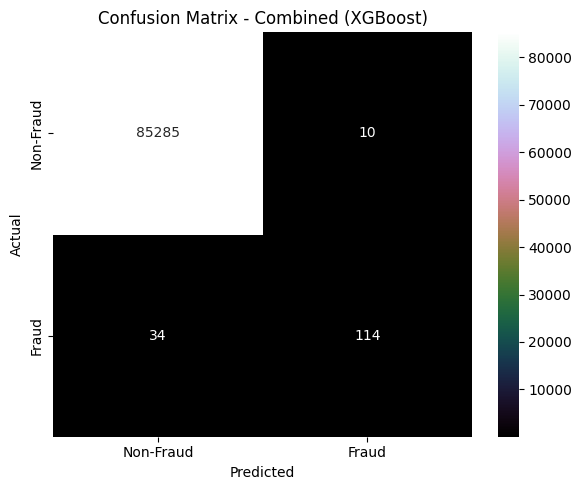

In [33]:
# Combine legit and fraud test data
x_combined_test = np.concatenate([x_legit_test, x_fraud_test])
y_combined_test = np.concatenate([y_legit_test, y_fraud_test])

# Predict on the combined test data
y_pred_combined = xgb_model.predict(x_combined_test)

# Compute confusion matrix
cm_combined = confusion_matrix(y_combined_test, y_pred_combined)

# Plot combined confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="cubehelix", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Combined (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

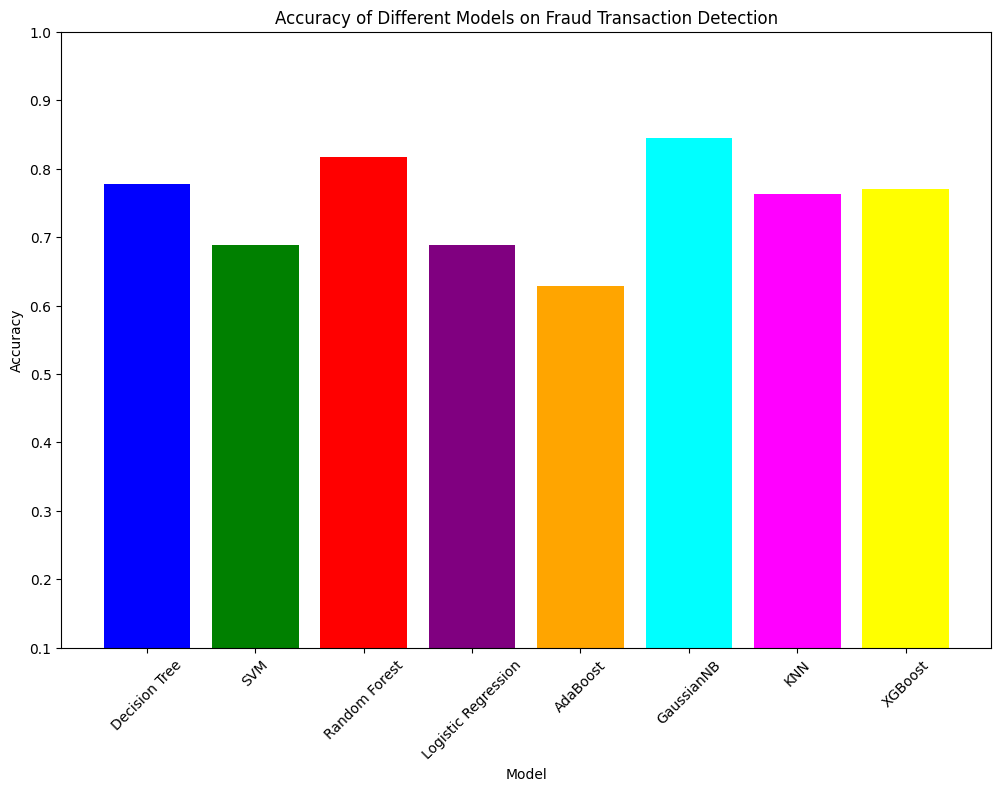

In [34]:
# Model names and accuracies
model_names = [
    'Decision Tree',
    'SVM',
    'Random Forest',
    'Logistic Regression',
    'AdaBoost',
    'GaussianNB',
    'KNN',
    'XGBoost'
]

accuracies = [
    accuracy_fraud_dt,
    accuracy_fraud_svm,
    accuracy_fraud_rf,
    accuracy_fraud_lr,
    accuracy_fraud_ab,
    accuracy_fraud_gnb,
    accuracy_fraud_knn,
    accuracy_fraud_xgb
]

# Plotting the accuracies
plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'teal'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on Fraud Transaction Detection')
plt.ylim(0.1, 1.0)  # Adjust the y-axis range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


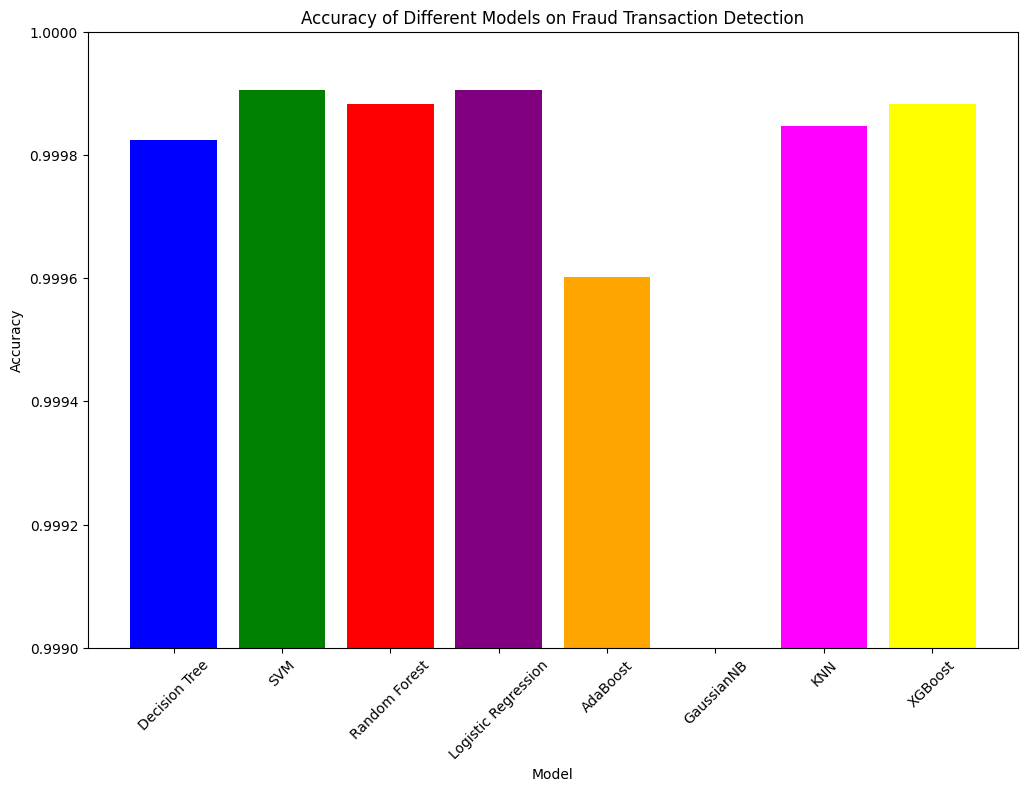

In [35]:
# Model names and accuracies
model_names = [
    'Decision Tree',
    'SVM',
    'Random Forest',
    'Logistic Regression',
    'AdaBoost',
    'GaussianNB',
    'KNN',
    'XGBoost'
]

accuracies = [
    accuracy_legit_dt,
    accuracy_legit_svm,
    accuracy_legit_rf,
    accuracy_legit_lr,
    accuracy_legit_ab,
    accuracy_legit_gnb,
    accuracy_legit_knn,
    accuracy_legit_xgb
]

# Plotting the accuracies
plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'teal'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on Fraud Transaction Detection')
plt.ylim(0.999, 1.0)  # Adjust the y-axis range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


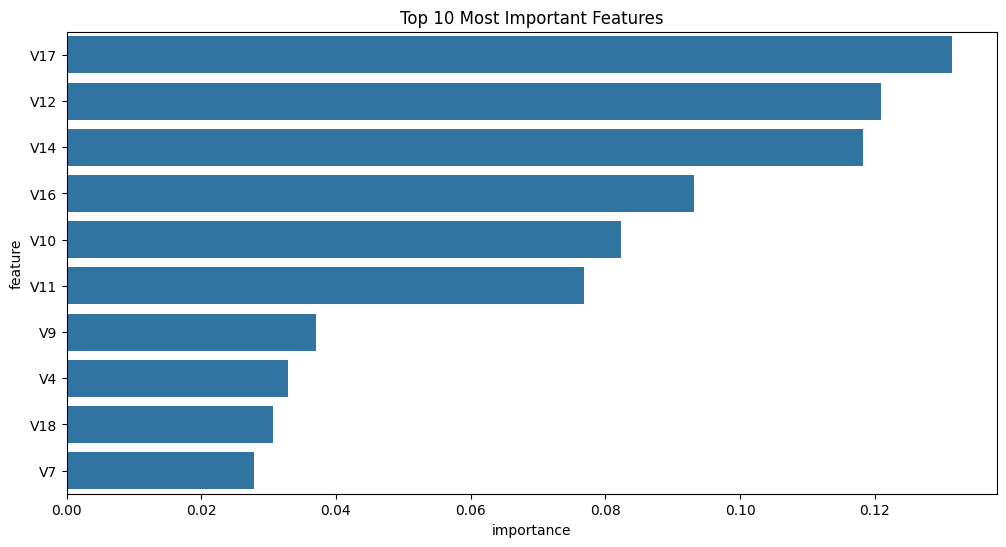

In [36]:
feature_importance = pd.DataFrame({
    'feature': df.columns[1:30],  # Exclude 'Time' and 'Class' columns
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()